<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/BITCOIN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries
Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.
Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
Matplotlib/Seaborn – This library is used to draw visualizations.
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/bitcoin.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.shape

(2713, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.

While performing the EDA of the Bitcoin Price data we will analyze how prices of the cryptocurrency have moved over the period of time and how the end of the quarters affects the prices of the currency.

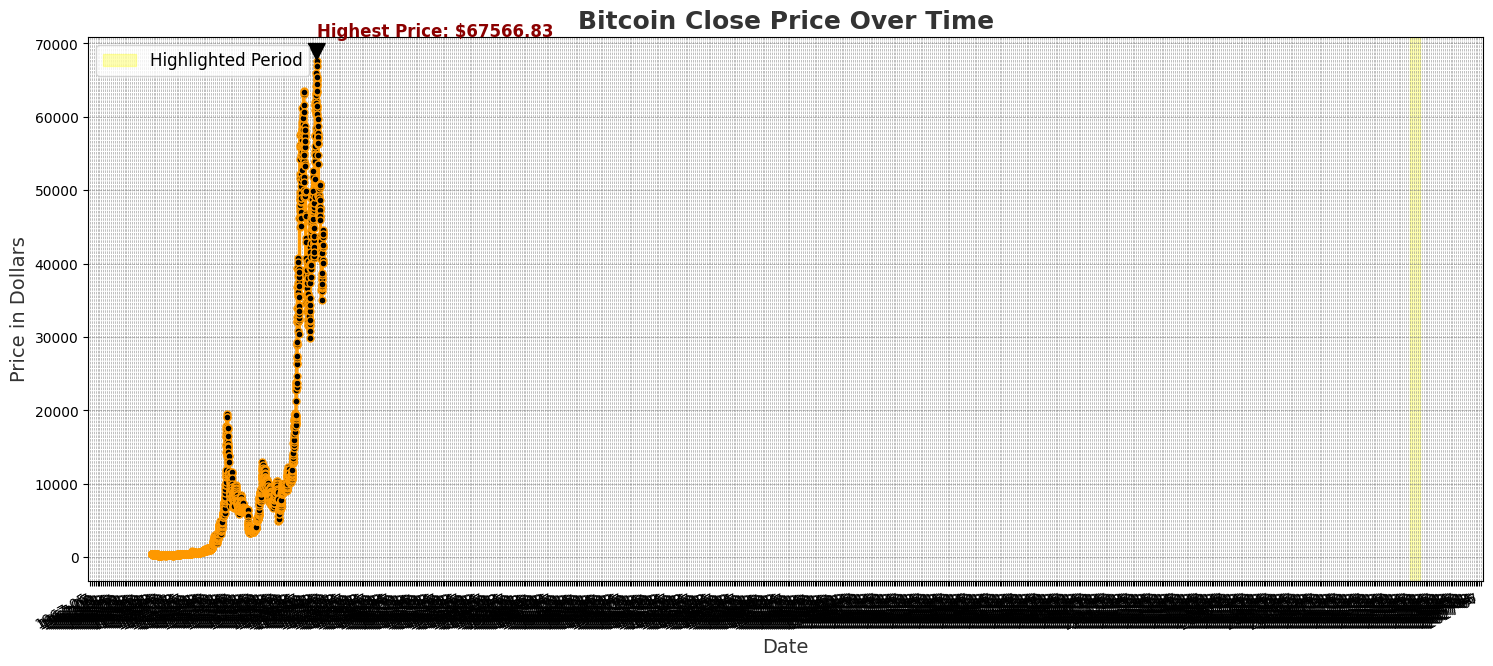

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(18, 8))
plt.plot(df['Close'], color='#FF9900', linestyle='-', linewidth=2.5, marker='o', markerfacecolor='black', markersize=5)
# Set the title with a custom font size and style
plt.title('Bitcoin Close Price Over Time', fontsize=18, fontweight='bold', color='#333333')
# Customize the x-axis and y-axis labels with larger fonts and colors
plt.xlabel('Date', fontsize=14, color='#333333')
plt.ylabel('Price in Dollars', fontsize=14, color='#333333')
# Set grid style
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
# Format date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
# Add a shaded region to highlight a specific period (e.g., recent months)
highlight_start = '2024-06-01'
highlight_end = '2024-10-31'
plt.axvspan(pd.to_datetime(highlight_start), pd.to_datetime(highlight_end), color='yellow', alpha=0.3, label='Highlighted Period')# Annotate the plot at a specific point of interest (e.g., highest price)
max_price = df['Close'].max()
max_price_date = df['Close'].idxmax()
plt.annotate(f'Highest Price: ${max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price * 1.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='darkred', fontweight='bold')
# Adding a legend for shaded areas
plt.legend(loc='upper left', fontsize=12)
# Show the plot
plt.show()

The prices of the Bitcoin stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [ ]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


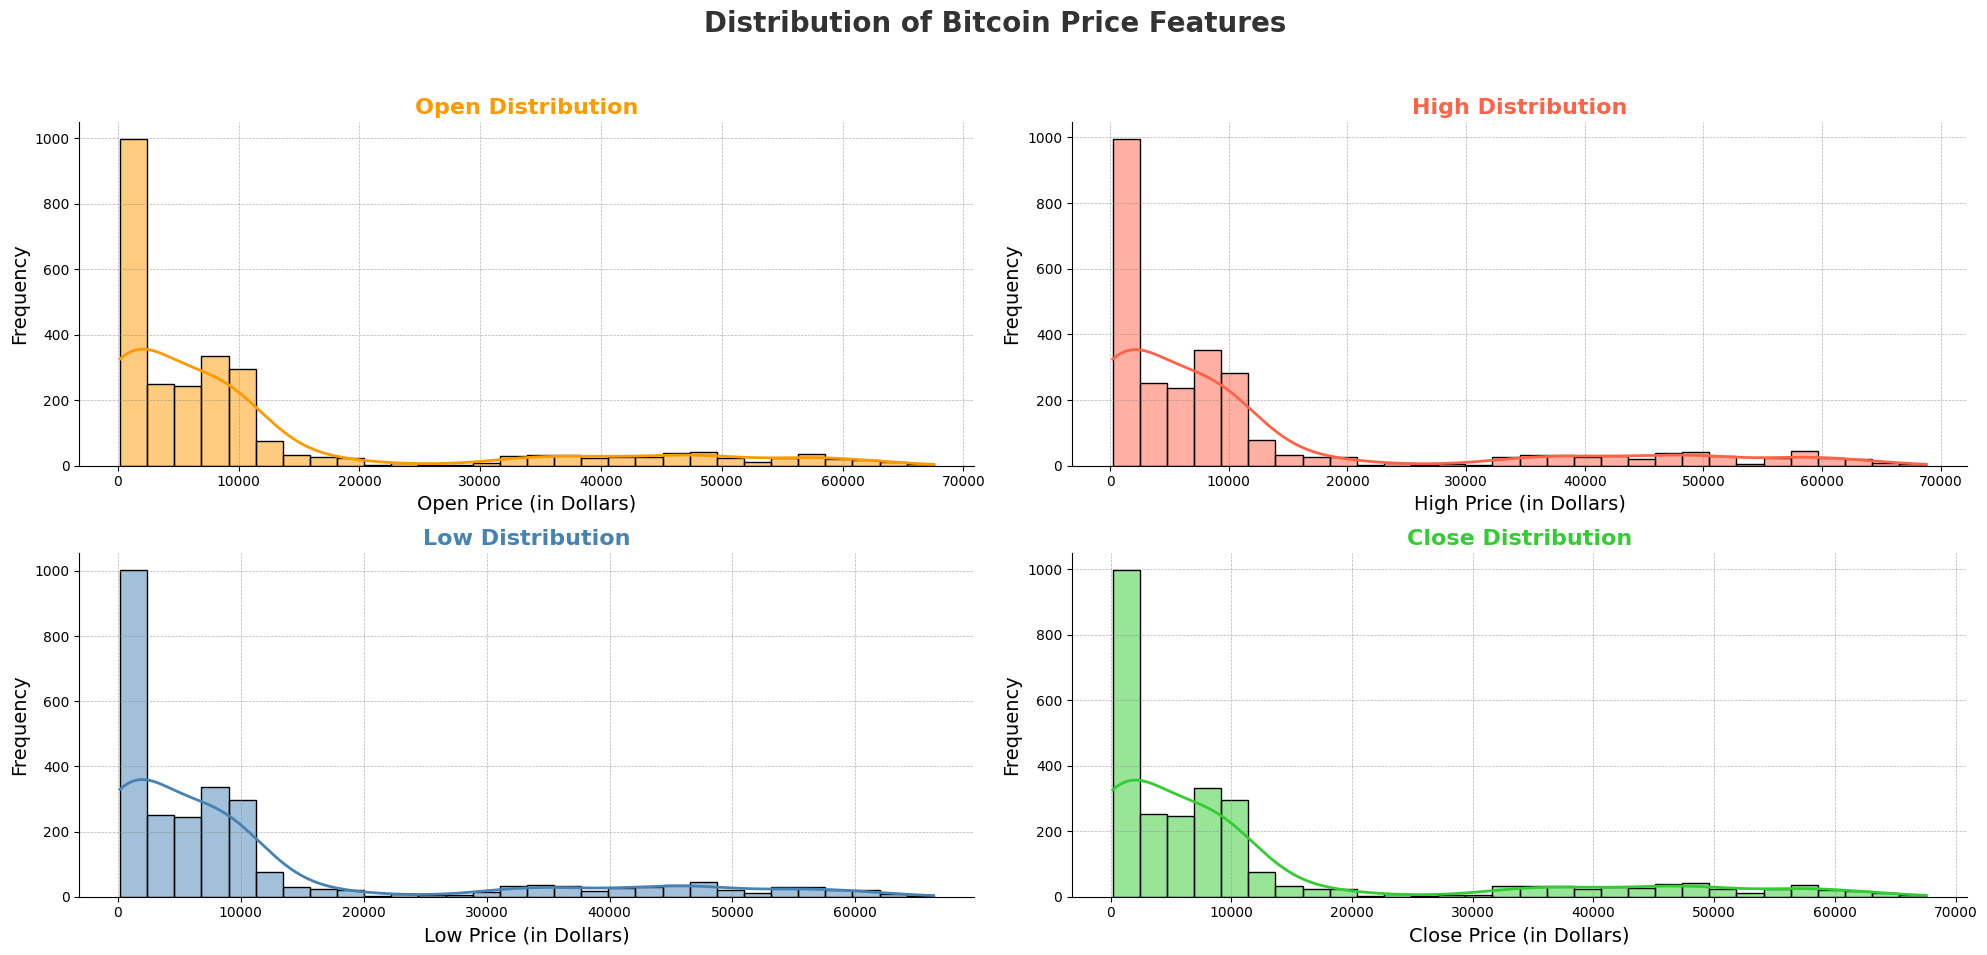

In [ ]:
# Define the features variable
features = ['Open', 'High', 'Low', 'Close']

# Your existing plotting code
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Set a color palette and figure size
colors = ['#FF9900', '#FF6347', '#4682B4', '#32CD32']
plt.figure(figsize=(20, 10))
plt.suptitle('Distribution of Bitcoin Price Features', fontsize=20, fontweight='bold', color='#333333')

# Loop through each feature and create an advanced distplot
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    # Customize the distribution plot
    sb.histplot(df[col], kde=True, color=colors[i], bins=30, edgecolor='black',
                line_kws={'linewidth': 2}, fill=True)
    # Add titles and labels
    plt.title(f'{col} Distribution', fontsize=16, fontweight='bold', color=colors[i])
    plt.xlabel(f'{col} Price (in Dollars)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    # Remove top and right spines for a cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Add a grid with specific style
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leaves space for the main title
plt.show()


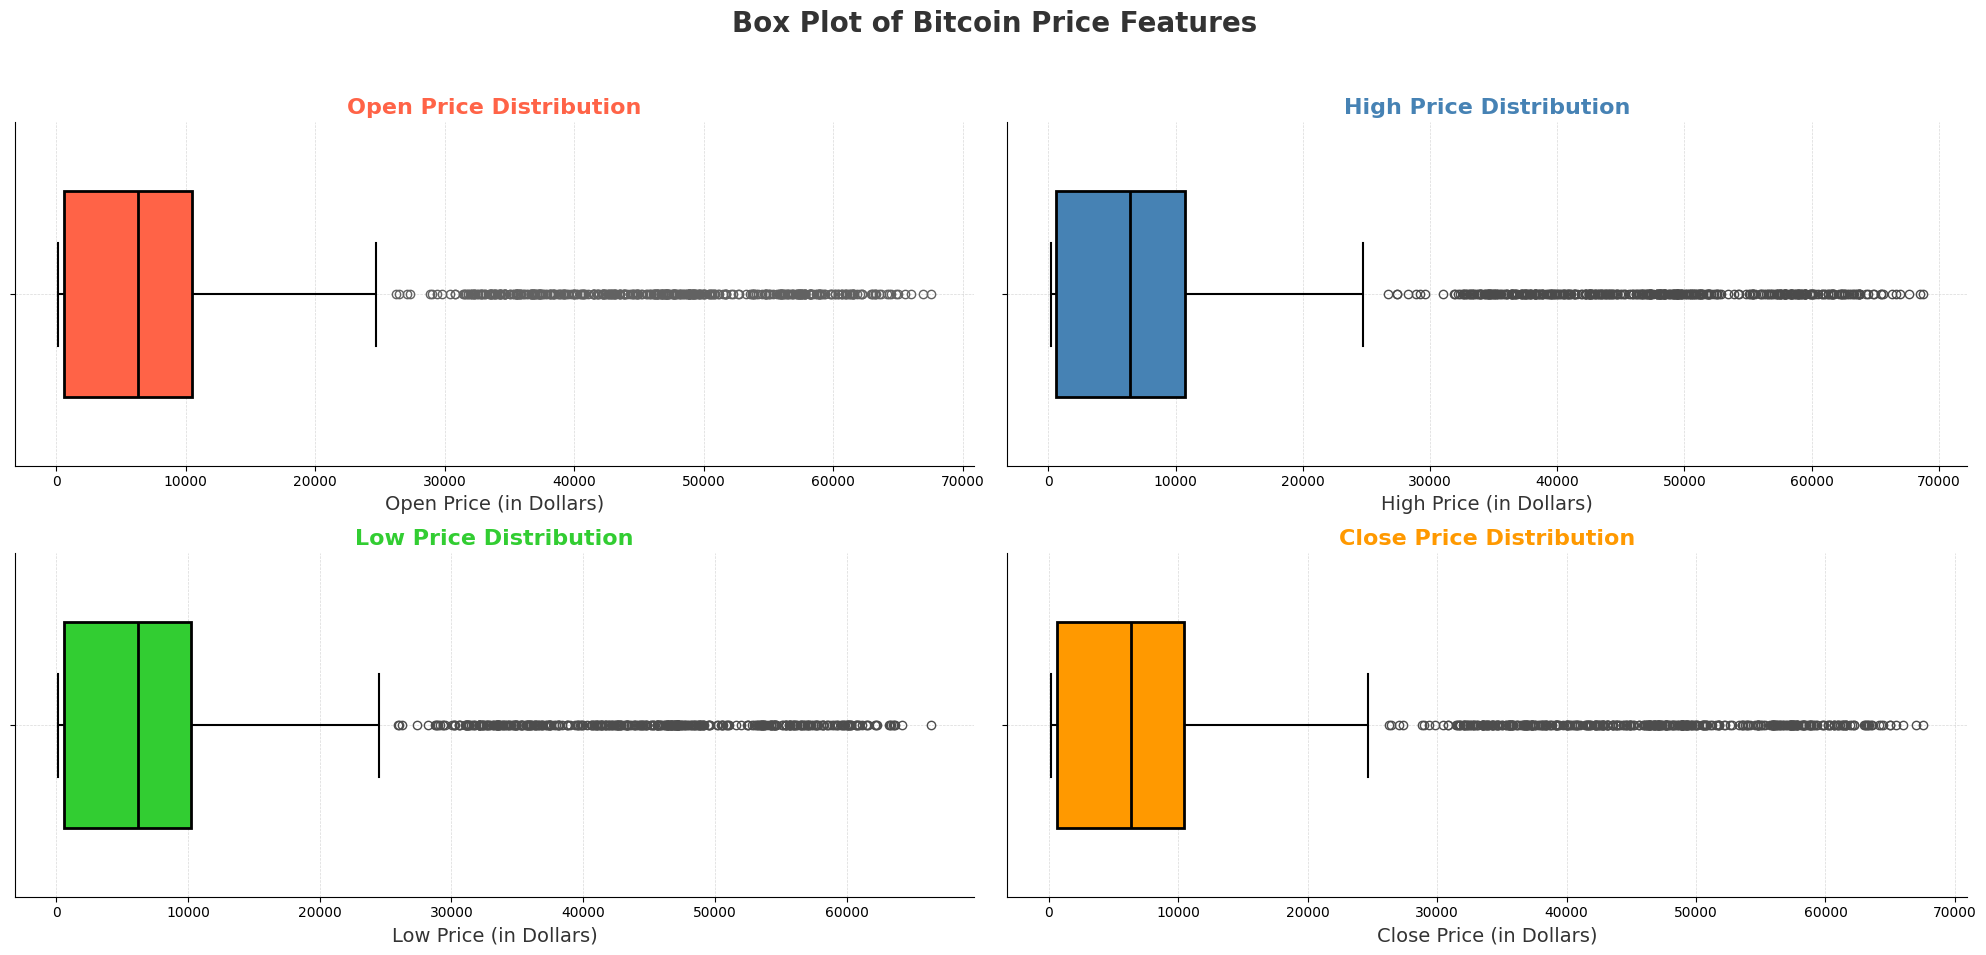

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define color palette for an attractive look
colors = ['#FF6347', '#4682B4', '#32CD32', '#FF9900']  # Vibrant colors for each plot

# Create a figure with a specified size and style
plt.figure(figsize=(20, 10))
plt.suptitle('Box Plot of Bitcoin Price Features', fontsize=20, fontweight='bold', color='#333333')

# Loop through each feature and create an advanced boxplot
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)

    # Customize the box plot with color and line width
    sb.boxplot(data=df, x=col, color=colors[i], saturation=0.75, linewidth=2, width=0.6,
               boxprops=dict(facecolor=colors[i], edgecolor='black'),
               whiskerprops=dict(color='black', linewidth=1.5),
               capprops=dict(color='black', linewidth=1.5),
               medianprops=dict(color='black', linewidth=2))

    # Titles and labels
    plt.title(f'{col} Price Distribution', fontsize=16, fontweight='bold', color=colors[i])
    plt.xlabel(f'{col} Price (in Dollars)', fontsize=14, color='#333333')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Feature Engineering**
Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.


In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()

# This code is modified by Susobhan Akhuli


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


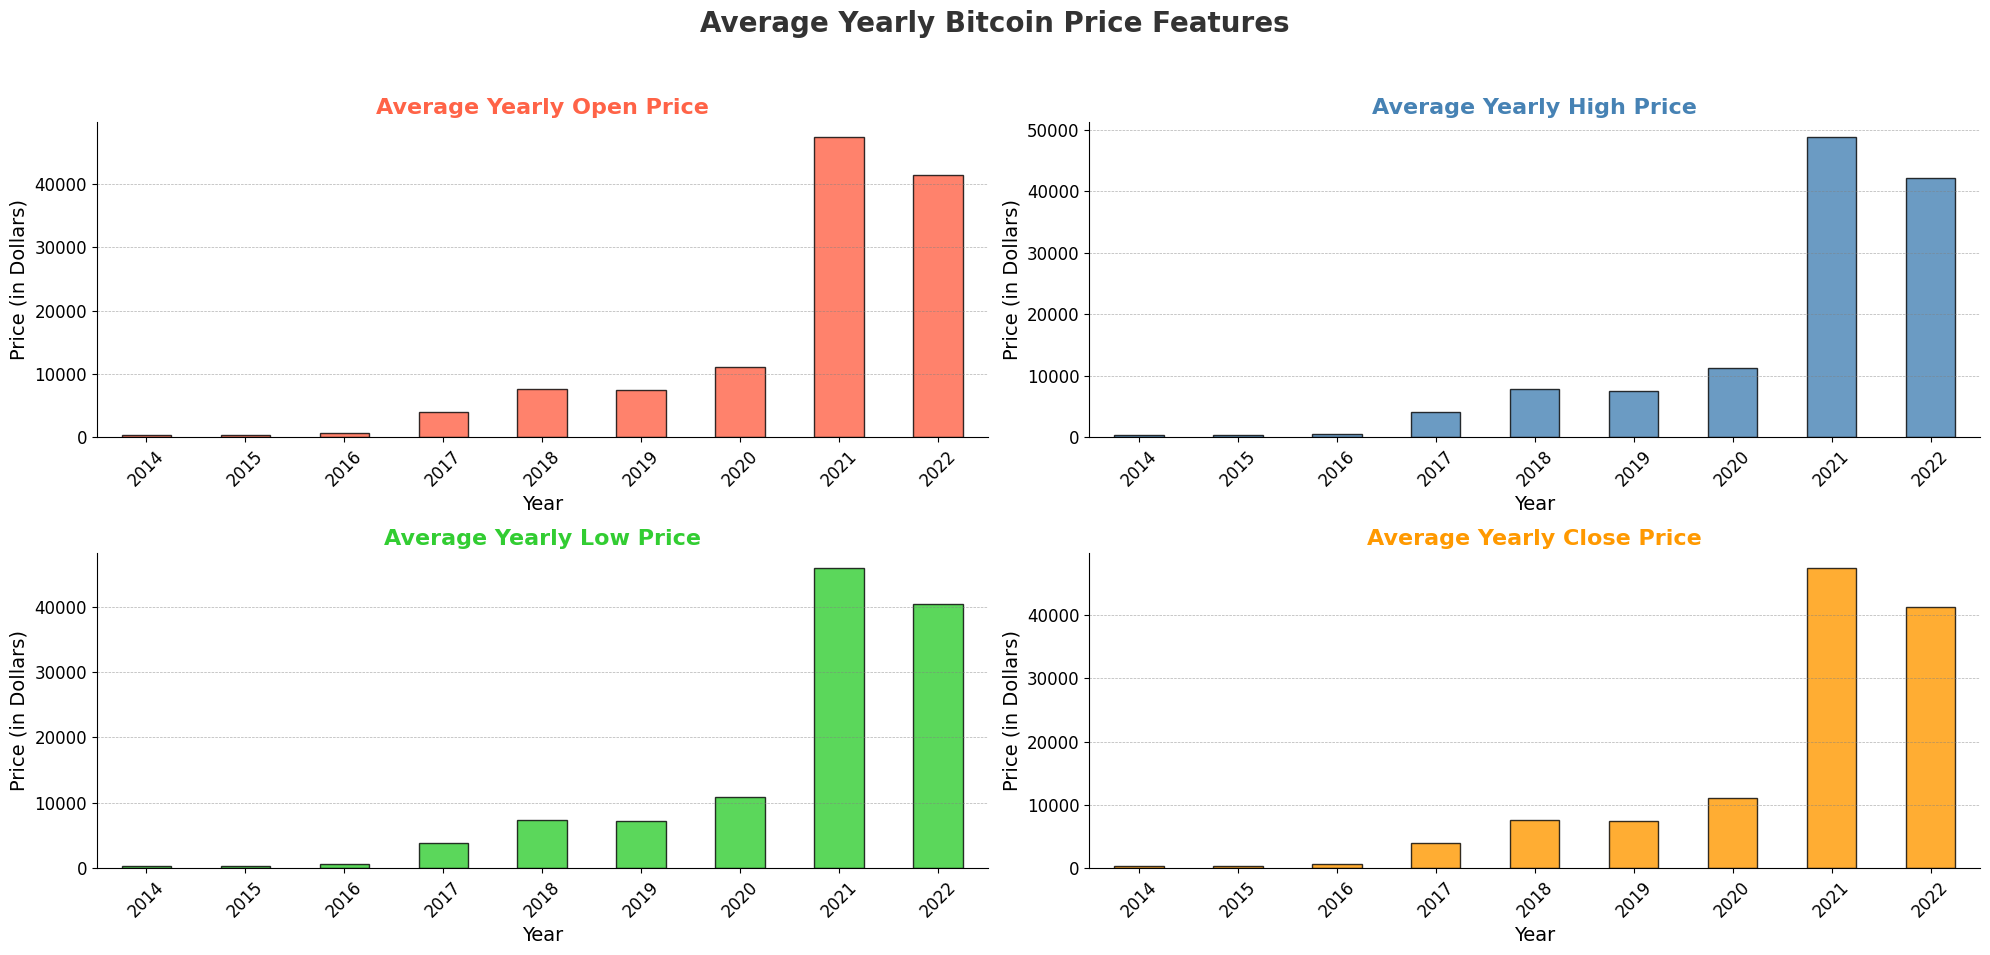

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each plot for an attractive look
colors = ['#FF6347', '#4682B4', '#32CD32', '#FF9900']  # Colors for each feature

# Create a figure with specified size and add a main title
plt.figure(figsize=(20, 10))
plt.suptitle('Average Yearly Bitcoin Price Features', fontsize=20, fontweight='bold', color='#333333')

# Loop through each feature and create a customized bar plot
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)

    # Bar plot with customized color
    data_grouped[col].plot(kind='bar', color=colors[i], edgecolor='black', alpha=0.8)

    # Add titles, labels, and customize ticks
    plt.title(f'Average Yearly {col} Price', fontsize=16, fontweight='bold', color=colors[i])
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Price (in Dollars)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Remove top and right spines for a cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add gridlines for visual clarity
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

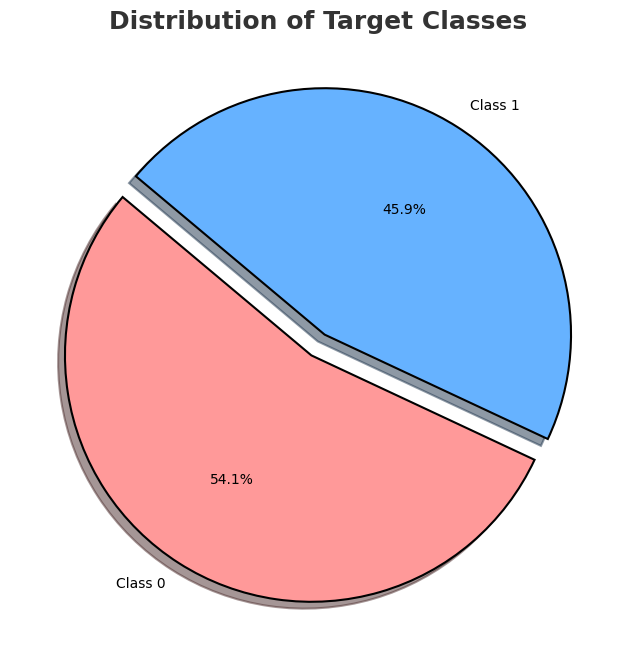

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each target label
colors = ['#FF9999', '#66B2FF']  # Soft pink and light blue for a warm, friendly look
labels = ['Class 0', 'Class 1']

# Create a pie chart with enhancements
plt.figure(figsize=(8, 8))
plt.pie(
    df['target'].value_counts().values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Black edge for each slice
    shadow=True,  # Adds a soft shadow effect
    explode=(0.05, 0.05)  # Slight separation of slices for emphasis
)

# Add a title with customized font
plt.title('Distribution of Target Classes', fontsize=18, fontweight='bold', color='#333333')

# Display the plot
plt.show()


When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

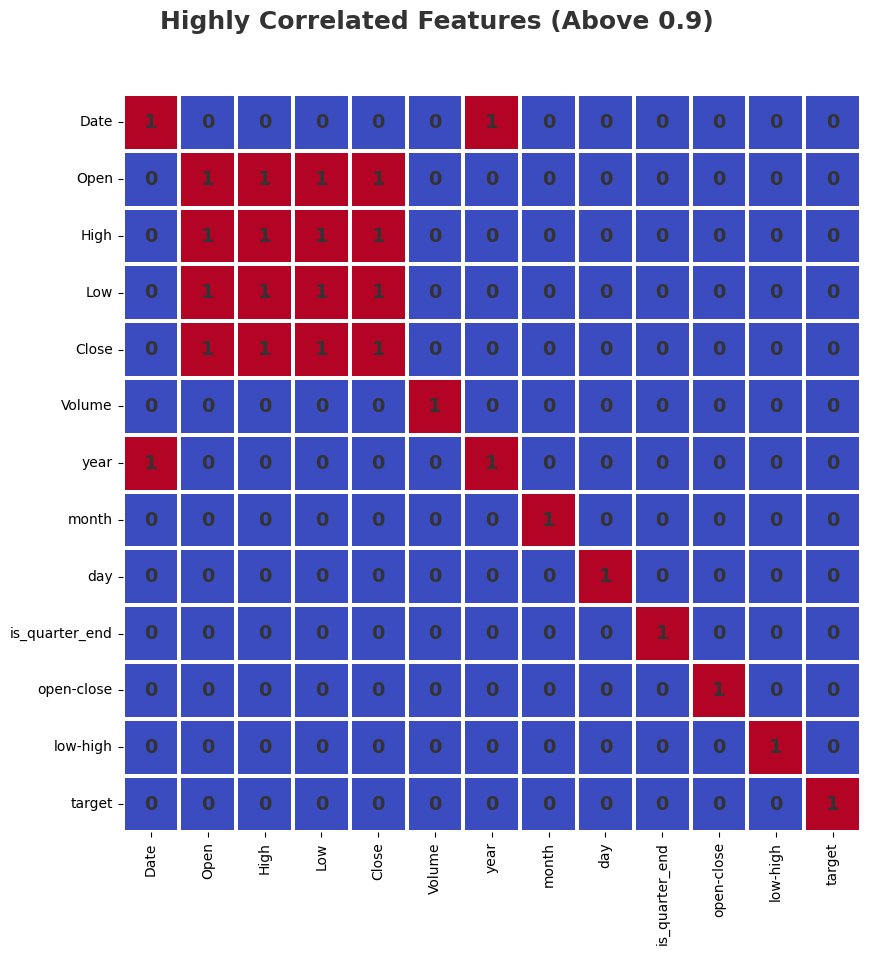

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Set figure size and background style
plt.figure(figsize=(10, 10))
plt.suptitle("Highly Correlated Features (Above 0.9)", fontsize=18, fontweight="bold", color="#333333")

# Define a soft color palette for the heatmap
cmap = sb.color_palette("coolwarm", as_cmap=True)

# Generate a heatmap with adorable customizations
sb.heatmap(
    df.corr() > 0.9,
    annot=True,
    cmap=cmap,
    cbar=False,
    square=True,
    linewidths=1.5,  # Adds space between cells for a neat look
    linecolor="white",  # White lines to separate cells
    annot_kws={"size": 14, "fontweight": "bold", "color": "#333333"}  # Font styling for annotations
)

# Remove unnecessary spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2441, 3) (272, 3)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
Model Development and Evaluation
Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.
For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [28]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5272712493564907
Validation Accuracy :  0.5187429004165088

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4828745224483161
Validation Accuracy :  0.5278844593498134

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.
Now let’s plot a confusion matrix for the validation data.

<Figure size 1000x1000 with 0 Axes>

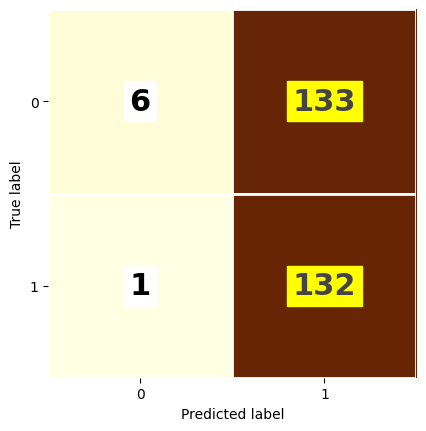

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sb
import numpy as np

# Set the figure size and title
plt.figure(figsize=(10, 10))
plt.suptitle("Confusion Matrix for Model", fontsize=24, fontweight="bold", color="#333333")

# Create and display the confusion matrix with customizations
cmap = plt.cm.YlOrBr  # Using a built-in yellow-orange-brown colormap

disp = ConfusionMatrixDisplay.from_estimator(
    models[0],
    X_valid,
    Y_valid,
    cmap=cmap,
    colorbar=False
)

# Normalize confusion matrix values for color mapping
max_value = disp.confusion_matrix.max()

# Customize the appearance of the matrix
for i in range(len(disp.confusion_matrix)):
    for j in range(len(disp.confusion_matrix[i])):
        cell_color = cmap(disp.confusion_matrix[i, j] / max_value)
        disp.ax_.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=cell_color, ec="white", lw=2))

        # Customize text appearance
        text = disp.text_[i, j]
        text.set_fontsize(22)  # Increased font size for better readability
        text.set_fontweight("bold")
        text.set_color("#444444" if disp.confusion_matrix[i, j] > max_value / 2 else "#000000")  # Darker text for better contrast
        # Set background color to white for better visibility
        text.set_backgroundcolor('#ffffff' if disp.confusion_matrix[i, j] <= max_value / 2 else 'yellow')

# Remove spines for a cleaner appearance
for spine in disp.ax_.spines.values():
    spine.set_visible(False)

# Adjust grid lines and background
disp.ax_.grid(False)  # Remove grid lines
disp.ax_.set_facecolor('#f7f7f7')  # Light gray background for a soft look

# Display the plot with additional adjustments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
